In [59]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from random import expovariate
import pandas as pd
import seaborn as sns

# Women Age range 50-54 - 376 cases per 10**4
a = 376/10**5
a

0.00376

(array([99623.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   377.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

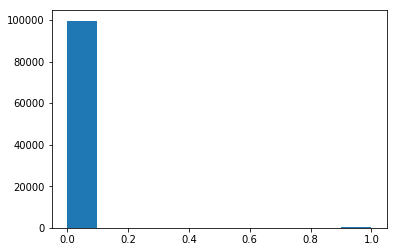

In [60]:
n, p = 1, a  # number of trials, probability of each trial
s = np.random.binomial(n, p, 100000)


dataset = pd.DataFrame(s)
plt.hist(s)

In [61]:
n = 1  # number of trials
sum_of_male_cases = []


# Probabilities and intervals from CancerResearchUK
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39']
male_interval = [0.0043,0.00259,0.00227,0.00418,0.00696,0.01086,0.01401,0.01666]#probability each age interval





# Simulate tests in sample population
male_distribution = []
for i in male_interval:
    p = i
    male_distribution = np.random.binomial(n, p, 100000) #cases per interval using binomial distribution with probabilites from from cancerresearchuk
    sum_of_male_cases.append(male_distribution.sum()) # each age group is tested for cancer and random positives are chosen from the population based on numbers from canceruk.
print(sum_of_male_cases)





[466, 255, 230, 372, 689, 1065, 1363, 1673]


In [62]:
sum_of_female_cases = []

female_interval = [0.0037,0.00183,0.00205,0.004,0.00787,0.01682,0.02426,0.03293]


female_distribution = []
for i in female_interval:
    p = i
    female_distribution = np.random.binomial(n, p, 100000) #cases per interval using binomial distribution with probabilites from from cancerresearchuk
    sum_of_female_cases.append(female_distribution.sum()) # each age group is tested for cancer and random positives are chosen from the population based on numbers from canceruk.
print(sum_of_female_cases)


[370, 197, 227, 401, 823, 1782, 2547, 3205]


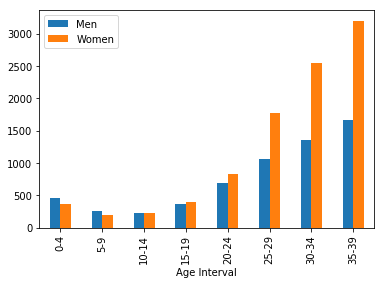

In [63]:
# Create Pandas Dataframe from simulation results
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39']
myframe = pd.DataFrame(sum_of_male_cases, columns=['Men'])
myframe['Age Interval'] = labels #created new column in dataframe for interval labels
myframe['Women']= sum_of_female_cases
myframe.set_index("Age Interval",drop=True,inplace=True)#used Pandas set index method to set col as index




# Plot results of Binomial Distribution
myframe.plot(kind='bar')#line plot is better visualisation


In [64]:
myframe

,Men,Women
Age Interval,,
0-4,466,370
5-9,255,197
10-14,230,227
15-19,372,401
20-24,689,823
25-29,1065,1782
30-34,1363,2547
35-39,1673,3205


In [31]:
dataset.describe()

,0
count,100000.000000
mean,0.003820
std,0.061688
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dataset.sum() #average incidence rate of cancer 

In [ ]:
year = 0
results = []

for year in range(1,80):
    year = int(expovariate(1/59)) #cases per year using exponential distribution with mean no. of cases from cancerresearchuk
    print(year)
    results.append(year)
   
    
np.array(results)



plt.show()

my_df = pd.DataFrame(results)

plt.plot(x=my_df.index.values,y=my_df)


https://www.cancerresearchuk.org/health-professional/cancer-statistics/incidence/age#heading-Zero
https://stackoverflow.com/questions/1155539/how-do-i-generate-a-poisson-process/10250877#10250877

https://www.dataquest.io/blog/adding-axis-labels-to-plots-with-pandas-and-matplotlib/

In [ ]:
my_df

In [ ]:
myframe




In [ ]:
test = np.random.binomial(100000, .3, 1)

In [ ]:
print(len(test))

In [8]:
myframe


,Men
Age Interval,
0-4,406
5-9,264
10-14,240
15-19,368
20-24,654
25-29,1094
30-34,1373
35-39,1690
